In [1]:
# Start writing code here...

## CHALLENGE: Analyzing Text about Big Data & Machine Learning

### GOAL

We would be using some text mining to discover more related concepts in Big Data and Machine Learning. I would start with a text data about Big Data, get keywords and then visulaize it.

### STEP 1 :

Get data. I would be getting the data I would using for this project from wikipedia.

In [2]:
url = 'https://en.wikipedia.org/wiki/Big_data'

In [3]:
# use the requests library to get the information we need from the url
import requests

text =requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Big data - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1ccd8d9c-cb1a-4041-bf13-5462c4dbea16","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Big_data","wgTitle":"Big data","wgCurRevisionId":1091054316,"wgRevisionId":1091054316,"wgArticleId":27051151,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","CS1 errors: missing periodical","CS1 maint: multiple names: authors list","Articles with short description","Short description is d

In [4]:
# transform data into a form suitable for processing. 
# our data source is from HTML, therefore we need to change to plain text.
# using the HTMLparser object from python to process it.

from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ''
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ['script', 'style']:
            self.script = True
    def handle_endtag(self,tag):
        if tag.lower() in ['script', 'style']:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])


 Big data - Wikipedia Big data From Wikipedia, the free encyclopedia Jump to navigation Jump to search Information assets characterized by high volume, velocity, and variety This article is about large collections of data. For the band, see  Big Data (band) . For the practice of buying and selling of personal and consumer data, see  Surveillance capitalism . Non-linear growth of digital global information-storage capacity and the waning of analog storage [1] Big data  refers to  data sets  that are too large or complex to be dealt with by traditional  data-processing application software . Data with many fields (rows) offer greater  statistical power , while data with higher complexity (more attributes or columns) may lead to a higher  false discovery rate . [2]  Big data analysis challenges include  capturing data ,  data storage ,  data analysis , search,  sharing ,  transfer ,  visualization ,  querying , updating,  information privacy , and data source. Big data was originally asso

In [5]:
# Lets draw some insights from this data
# My goal here is to get related concepts in Big data
# That means i searching for keywords
# I would be using the Pythin library RAKE for keyword extraction

In [6]:
import sys
!{sys.executable} -m pip install nlp_rake

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [7]:
# RAKE object gives the ability to customize our keywords pararmeters
#  For this example minimum length of my keyword would be 5
# Frequency of the keyword is 4
# Maximum number of words in the keyword is 3

import nlp_rake
extractor = nlp_rake.Rake(min_chars= 5, max_words=4, min_freq=4)
res = extractor.apply(text)
res

[('potentially dated statements', 8.7),
 ('digital trace data', 8.321468609865471),
 ('wayback machine ^', 7.8021875000000005),
 ('harvard business review', 7.604545454545455),
 ('big data analytics', 7.419872520769382),
 ('big data policing', 7.212465113361975),
 ('data sets', 5.456337030918102),
 ('wayback machine', 5.4350000000000005),
 ('big data', 5.012465113361975),
 ('cite journal', 4.875),
 ('machine learning', 4.782222222222222),
 ('business intelligence', 4.721212121212121),
 ('artificial intelligence', 4.6952380952380945),
 ('data analysis', 4.690786791683653),
 ('international journal', 4.583333333333334),
 ('data collected', 4.437540038436899),
 ('computer-aided diagnosis', 4.4),
 ('unstructured data', 4.39785749875436),
 ('english version', 4.2),
 ('latin america', 4.0),
 ('york times', 3.8),
 ('retrieved 29 december 2016', 3.4756410256410257),
 ('retrieved 12 december 2015', 3.4756410256410257),
 ('retrieved 9 august 2013', 3.4423076923076925),
 ('retrieved 8 october 201

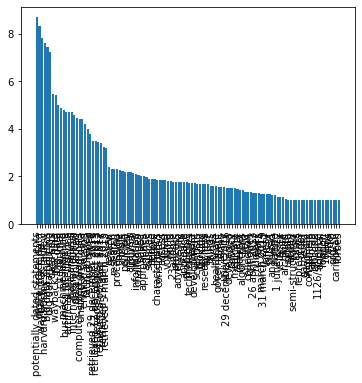

In [8]:
# lets visualize the data for better understanding 

import matplotlib.pyplot as plt

def plot(pair_list):
    key, value = zip(*pair_list)
    plt.bar(range(len(key)), value)
    plt.xticks(range(len(key)),key,rotation='vertical')
    plt.show()

plot(res)

The above bar plot is not providing us with a good visualization, we can use the Word Cloud visualization to achieve a better result. WordCloud  object is responsible for taking in either original text, or pre-computed list of words with their frequencies, and returns and image, which can then be displayed using matplotlib.

In [9]:
!{sys.executable} -m pip install wordcloud

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


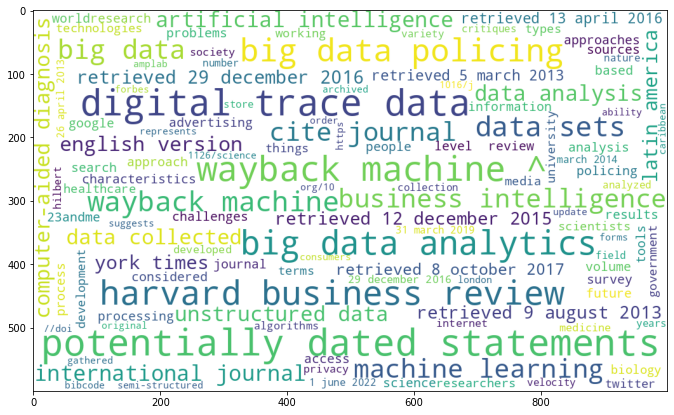

In [10]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', width=1000, height= 600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({key:value for key, value in res}))

In [11]:
plt.savefig('my_plot.png')

<Figure size 432x288 with 0 Axes>

### GOAL:

Extract related words in Machine Learning and visualize it on Word Cloud.


In [12]:
url ='https://en.wikipedia.org/wiki/Machine_learning'

In [13]:
# use requests to get data

ml_text= requests.get(url).content.decode('utf-8')
print(ml_text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"4e7f99ff-fbc4-4d38-a2ea-05c5a76aecb5","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1091831034,"wgRevisionId":1091831034,"wgArticleId":233488,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","CS1 maint: uses authors parameter","CS1 maint: url-status","Articles with short description","Short description 

In [14]:
# transform data to get suitable processable data using the html parser 


from html.parser import HTMLParser

class myHTMLParser(HTMLParser):
    script = False
    ml_res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.ml_res += ' '+data.replace('[ edit ]','')

my_parser = myHTMLParser()
my_parser.feed(ml_text)
ml_text = my_parser.ml_res
print(ml_text[:1000])


 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning  (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine (RVM) Support vector machine (SVM) Clustering BIRCH CURE Hierarch

In [15]:
# using the RAKE object to extract keywords using in-built parameters
# minimum characters is 5
# maximum words is 4
# frequency is 3

import nlp_rake
extractor= nlp_rake.Rake(min_chars=5, max_words=4, min_freq=3)
ml = extractor.apply(ml_text)
ml

[('embedded machine learning', 7.856393678160918),
 ('artificial neural networks', 7.821812596006144),
 ('inductive logic programming', 7.766666666666667),
 ('artificial neural network', 7.686474250141483),
 ('reinforcement learning algorithms', 7.583554964539006),
 ('machine learning algorithms', 7.56703197603326),
 ('sparse dictionary learning', 7.535416666666666),
 ('machine learning models', 7.270679392446634),
 ('machine learning model', 7.1539546537706755),
 ('learning classifier systems', 7.135416666666666),
 ('computational learning theory', 7.014962121212121),
 ('deep learning', 5.510416666666666),
 ('neural networks', 5.488479262672811),
 ('international conference', 5.084615384615384),
 ('reinforcement learning', 5.072916666666666),
 ('cs1 maint', 5.071428571428571),
 ('machine learning', 5.056393678160919),
 ('bayesian networks', 5.0476190476190474),
 ('supervised learning', 5.010416666666666),
 ('feature learning', 5.010416666666666),
 ('dimensionality reduction', 5.0),
 (

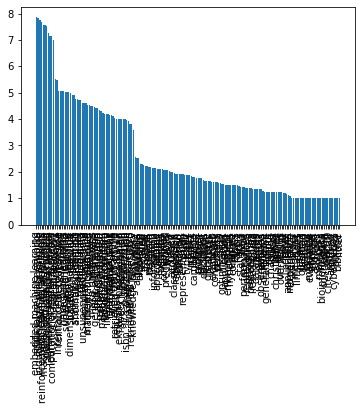

In [18]:
# visualize the data
def plot(ml_list):
    k,v = zip(*ml_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)), k, rotation='vertical')
    plt.show()
plot(ml)

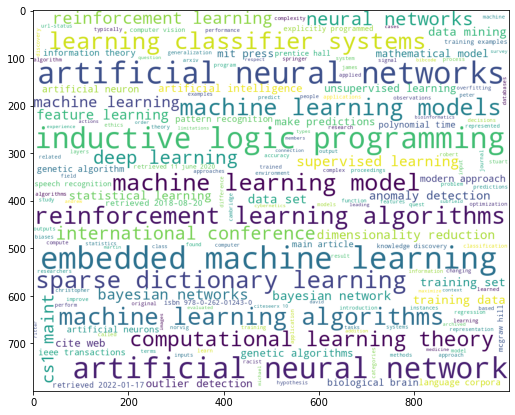

In [19]:
ml_wc = WordCloud(background_color='white', width= 1000, height=800)
plt.figure(figsize=(15,7))
plt.imshow(ml_wc.generate_from_frequencies({k:v for k,v in ml}))


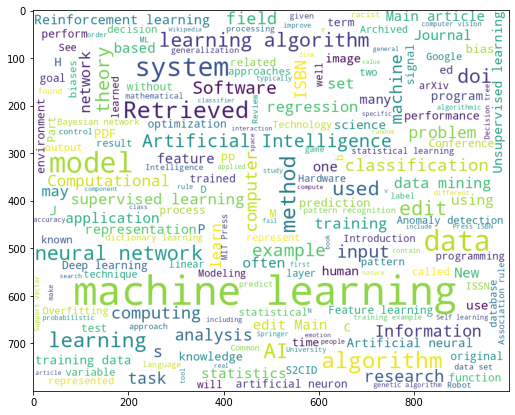

In [20]:
plt.figure(figsize=(15,7))
plt.imshow(ml_wc.generate(ml_text))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bed665d5-779f-4fec-a662-08f291860475' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>